## Housing Price Prediction - Assignment Solution

The solution is divided into the following sections:

- Data Understanding and Exploration
- Data Cleaning
- Data Preparation
- Model building and Evaluation

## Data understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size and attribute names etc.

In [147]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn import metrics

%matplotlib inline

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 500)

In [148]:
import warnings
warnings.filterwarnings("ignore")

In [149]:
# Reading the Dataset

house = pd.read_csv("C:/Users/Kunal/Documents/KunalPythonCodes/DataScienceProject/GeneralizedRegression/train.csv", na_values = "NAN")

In [150]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [151]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Exploratory Data Analysis

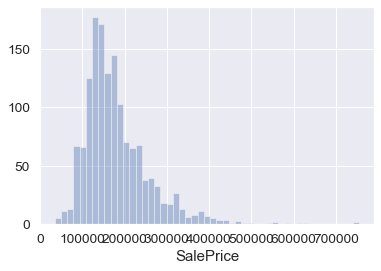

In [152]:
# Target Variable

sns.distplot(house['SalePrice'], kde = False)

In [153]:
# From the above plot, we can observe that the data is right skewed
# Checking the Skewness and Kurtosis
print("Skewness: %f" % house['SalePrice'].skew())
print("Kurtosis: %f" % house['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

<Figure size 1800x2880 with 0 Axes>

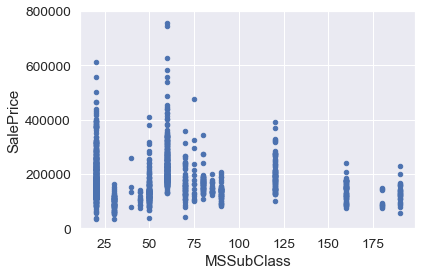

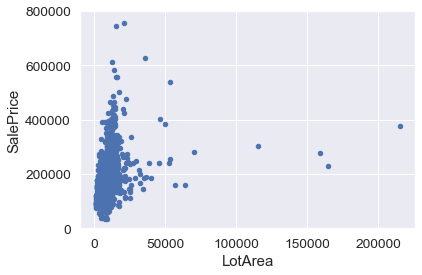

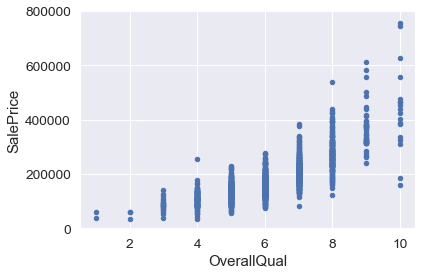

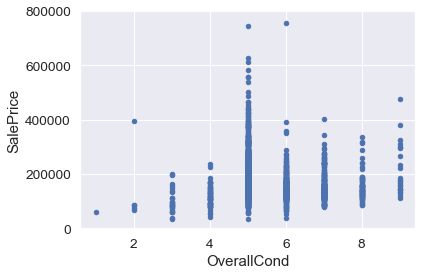

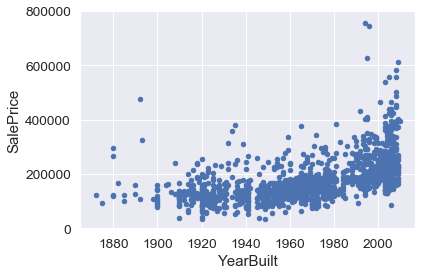

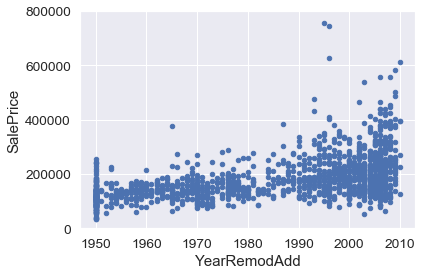

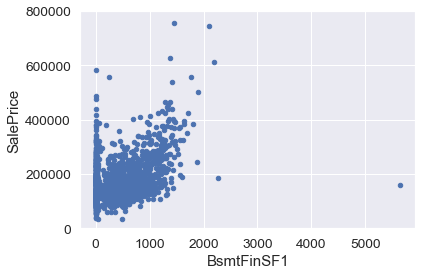

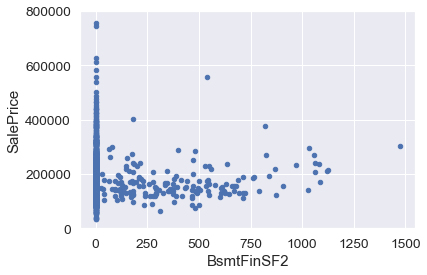

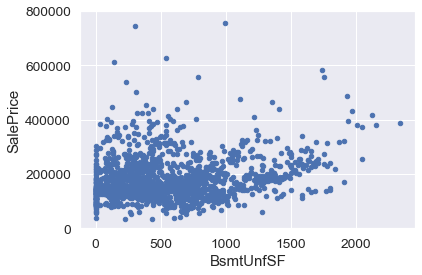

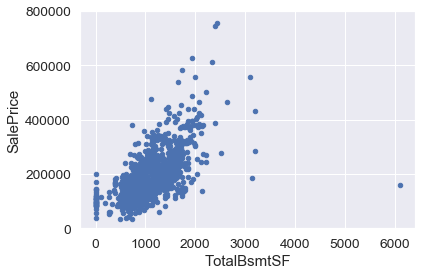

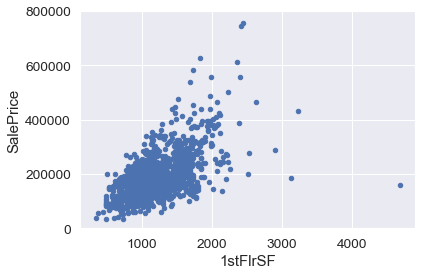

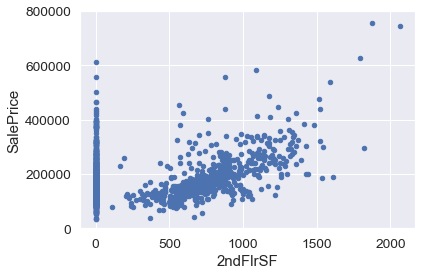

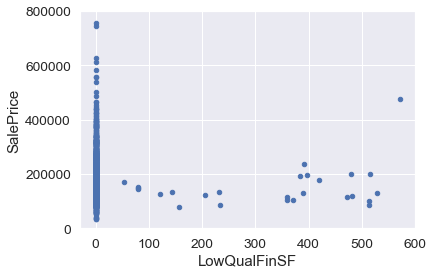

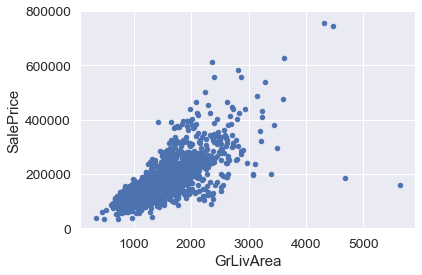

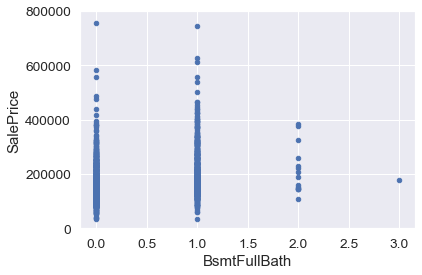

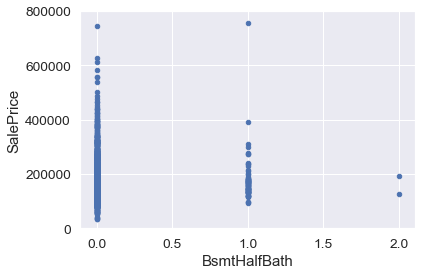

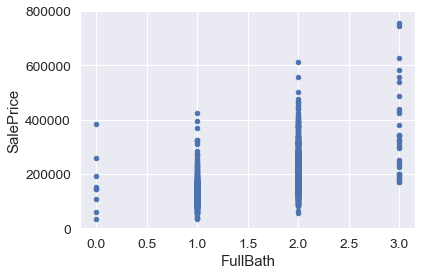

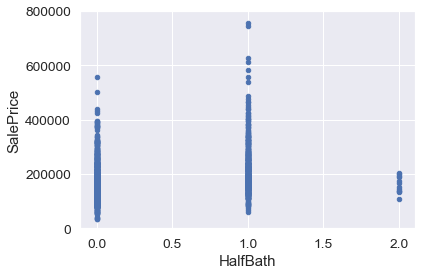

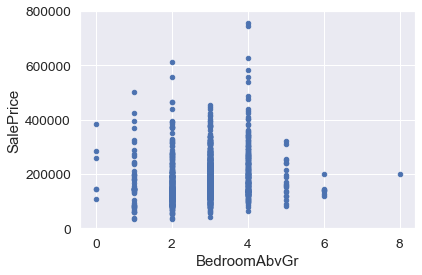

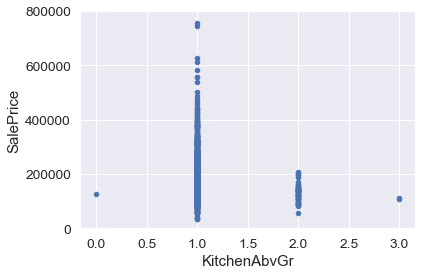

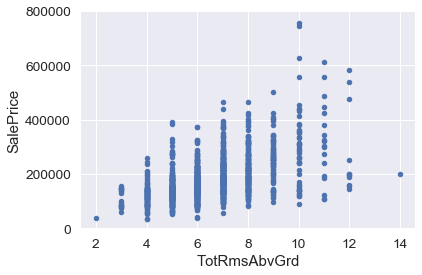

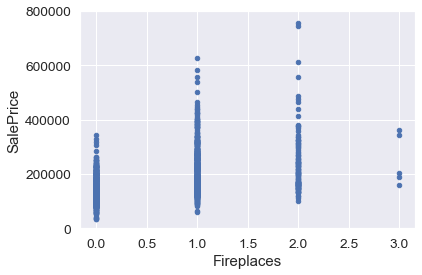

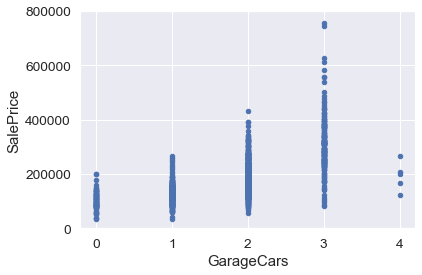

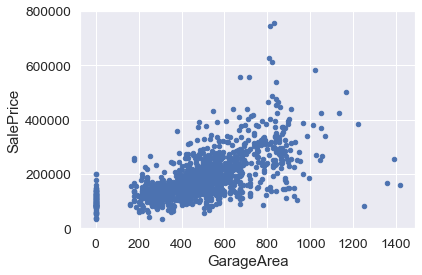

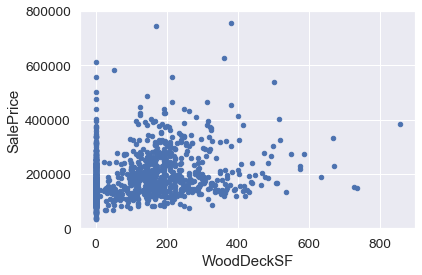

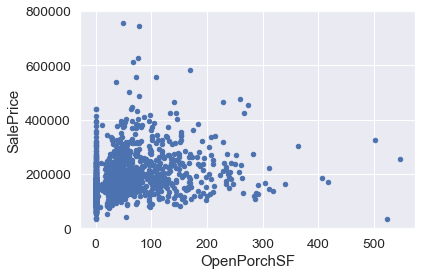

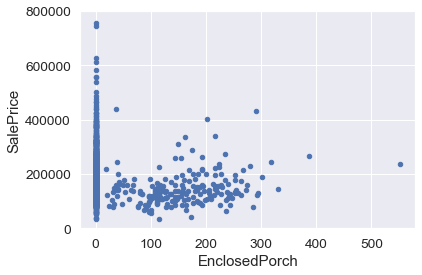

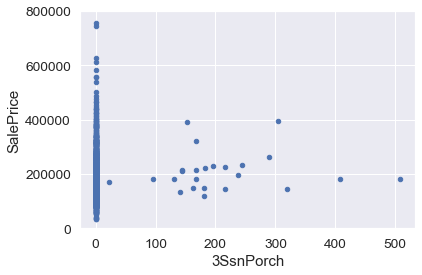

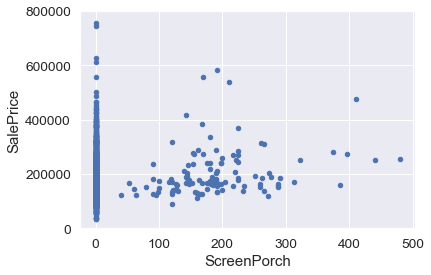

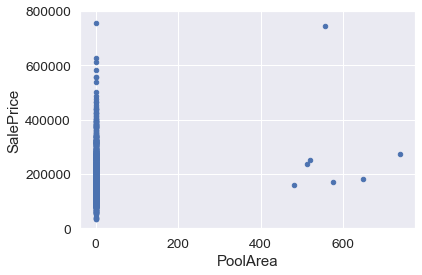

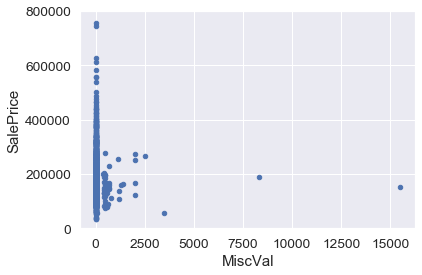

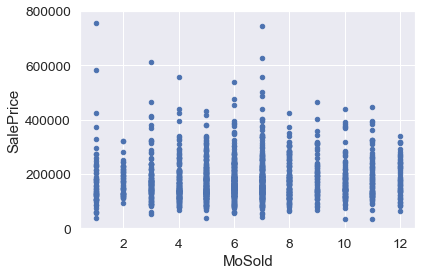

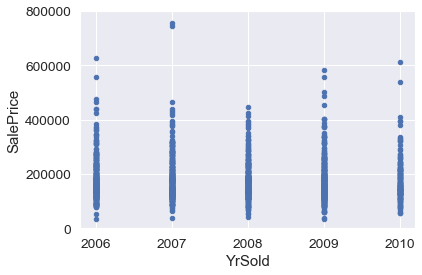

In [154]:
# Independent Numerical Variables
plt.figure(figsize = (25,40))
feature = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 
           'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 
           'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
           'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
           'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',  
           'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
           '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
for i in feature:    
    data = pd.concat([house['SalePrice'], house[i]], axis=1)    
    data.plot.scatter(x=i, y='SalePrice', ylim=(0,800000))

#### With the above EDA on the various features, we can infer that we don't see any pattern to apply any function like sine, cosine, square etc. Therefore, we will proceed with linear model building.

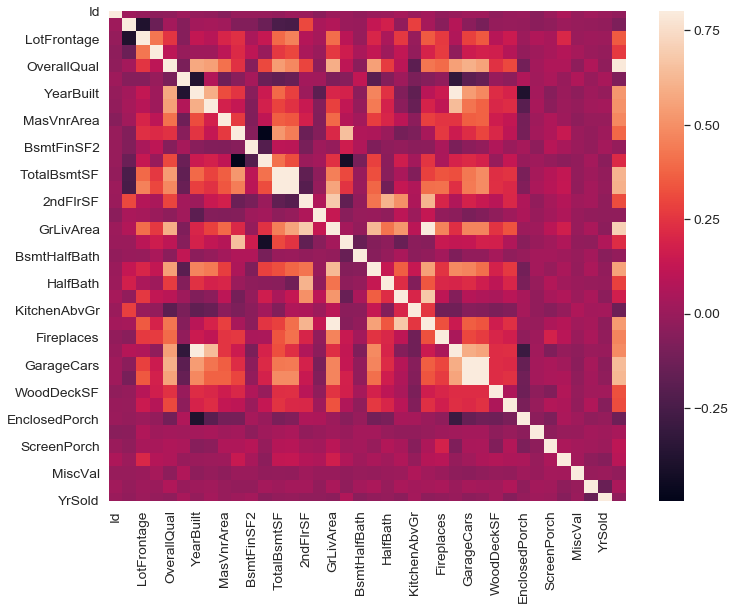

In [155]:
# Correlation Matrix
house_corr = house.corr()
fig, axes = plt.subplots(figsize = (12, 9))
sns.heatmap(house_corr, vmax = 0.8, square = True)

#### Let's find out the top 10 features whose correlation with the target variable(SalePrice) is more

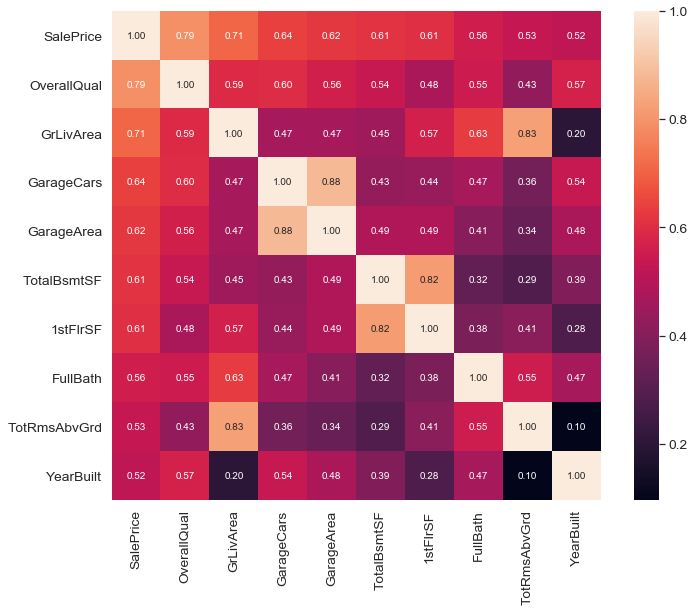

In [156]:
k = 10
cols = house_corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house[cols].values.T)
sns.set(font_scale=1.25)
fig, axes = plt.subplots(figsize = (12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

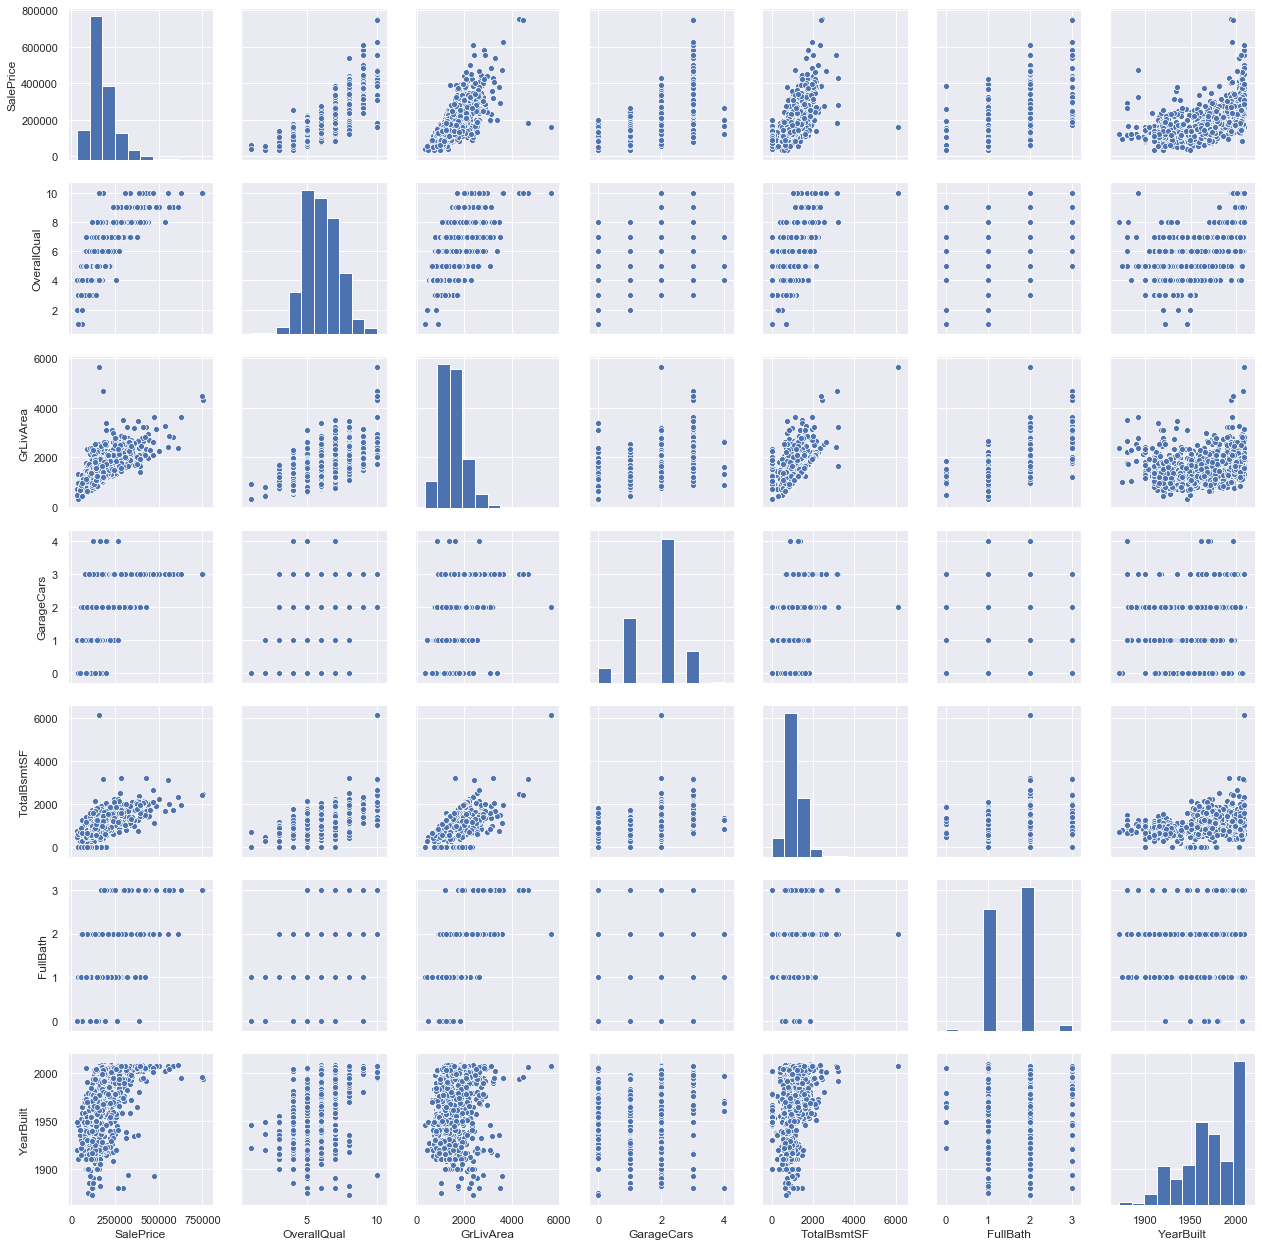

In [157]:
#scatterplot for all the top 10 features
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house[cols], size = 2.5)
plt.show();

### Missing Data Treatment

In [158]:
# Checking the attributes/features for missing values in them
round(100*(house.isnull().sum()/len(house.index)), 2).sort_values(ascending = False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

### Imputing the missing values

In order to effectively train our model, we have to first deal with the missing values in the data set. We do see there are missing values in both numerical and categorical variables.
- For numerical variables missing values' treament, we would typically fill the missing values with measure like mean, median and mode.
- For categorical variables missing values' treatment, we would fill the missing values with most occuring value from the entire column.

### Places Where NaN Means Something
If we look at the data description file provided, we will see that for some categories, NaN actually means something. This means that if a value is NaN, the house might not have that certain attribute, which will affect the price of the house. Therefore, it is better to not drop, but fill in the null cell with a value called "None" which serves as its own category.

In [159]:
null_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
                    "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish",
                     "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_has_meaning:
    house[i].fillna("None", inplace=True)

In [160]:
round(100*(house.isnull().sum()/len(house.index)), 2).sort_values(ascending = False)

LotFrontage      17.74
GarageYrBlt       5.55
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
SalePrice         0.00
ExterCond         0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
ExterQual         0.00
BsmtQual          0.00
Foundation        0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
YearRemodAdd      0.00
YearBuilt         0.00
TotalBsmtSF       0.00
Utilities         0.00
MSSubClass        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
LotConfig         0.00
OverallCond       0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
BsmtUnfSF         0.00
HeatingQC         0.00
Heating           0.00
ScreenPorch

### Imputing "Real" NaN Values

These are the real NaN values that we have to deal with accordingly because they were not recorded.

In [161]:
imputer = Imputer(strategy="median")

In [162]:
# Analysis on LotFrontage feature
house.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

#### LotFrontage has too many Null values and it is a numerical value so it may be better to just drop it.

In [163]:
house.drop("LotFrontage", axis=1, inplace=True)

In [164]:
# Missing Data
round(100*(house.isnull().sum()/len(house.index)), 2).sort_values(ascending = False)

GarageYrBlt      5.55
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
SalePrice        0.00
Foundation       0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
ExterQual        0.00
ExterCond        0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
BsmtFinSF2       0.00
BsmtUnfSF        0.00
RoofStyle        0.00
YearRemodAdd     0.00
Heating          0.00
YearBuilt        0.00
MSSubClass       0.00
MSZoning         0.00
LotArea          0.00
Street           0.00
Alley            0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
TotalBsmtSF      0.00
HeatingQC        0.00
SaleCondition    0.00
ScreenPorch      0.00
GarageQual       0.00
GarageCond

#### GarageYrBlt, MasVnrArea, and MasVnrType features have a fairly decent amount of missing values. MasVnrType is categorical so we can replace the missing values with "None", as we did before. We can fill the others with median

In [165]:
house['GarageYrBlt'].fillna(house['GarageYrBlt'].median(), inplace = True)
house['MasVnrArea'].fillna(house['MasVnrArea'].median(), inplace = True)
house['MasVnrType'].fillna("None", inplace = True)

In [166]:
# missing data
total = house.isnull().sum().sort_values(ascending = False)
percent = (house.isnull().sum()/len(house.index)).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head()

,Total,Percent
Electrical,1,0.000685
SalePrice,0,0.000000
Foundation,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000


#### Now that only one row has a null entry, we will drop the row.

In [167]:
house.dropna(inplace = True)

In [168]:
# Missing Data
round(100*(house.isnull().sum()/len(house.index)), 2).sort_values(ascending = False)

SalePrice        0.0
SaleCondition    0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
RoofStyle        0.0
YearRemodAdd     0.0
YearBuilt        0.0
Utilities        0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
LotConfig        0.0
OverallCond      0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
ScreenPorch      0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

In [169]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-

### Now we will determine the data type of all features remaining

In [170]:
# Type of each feature in the dataset: int, float, object
types_train = house.dtypes

# Numerical variables are either int or float
num_train = types_train[(types_train == 'int64')|(types_train == 'float')]

#Categorical variables are of type object
cat_train = types_train[types_train == 'object']

In [171]:
pd.DataFrame(types_train).reset_index().set_index(0).reset_index()[0].value_counts()

object     43
int64      35
float64     2
Name: 0, dtype: int64

In [172]:
# We should convert num_train to a list to make it easier to work with
numerical_values_train = list(num_train.index)

In [173]:
# These are the numerical variables in our dataset
print(numerical_values_train)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [174]:
# Now, we should convert cat_train to a list to make it easier to work with
categorical_values_train = list(cat_train.index)

In [175]:
# These are the categorical variables in our dataset
print(categorical_values_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Data Preparation

Now that we have dealt with all the missing values, it looks like it's time for some feature engineering, the second part of our data preprocessing. We need to create feature vectors in order to get the data ready to be fed into our model as training data. This requires us to convert the categorical values into representative numbers.

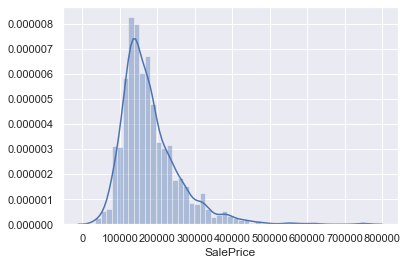

In [176]:
#Checking whether my target variable is normally distributed or not?
sns.distplot(house["SalePrice"])

It appears that the target, SalePrice, is very skewed and a transformation like a logarithm would make it more normally distributed. Machine Learning models tend to work much better with normally distributed targets, rather than greatly skewed targets. By transforming the prices, we can boost model performance.

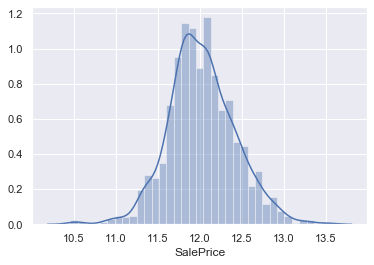

In [177]:
sns.distplot(np.log(house["SalePrice"]))

In [178]:
house["TransformedPrice"] = np.log(house["SalePrice"])

In [179]:
for i in categorical_values_train:
    feature_set = set(house[i])
    for j in feature_set:
        feature_list = list(feature_set)
        house.loc[house[i] == j, i] = feature_list.index(j)

In [180]:
house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedPrice
0,1,60,4,8450,1,0,3,3,1,3,1,17,4,3,0,6,7,5,2003,2003,1,7,3,2,3,196.0,1,2,3,2,3,1,3,706,1,0,150,856,4,4,1,1,856,854,0,1710,1,0,2,1,3,1,1,8,5,0,1,2,2003.0,0,2,548,3,3,2,0,61,0,0,0,0,0,3,2,0,2,2008,0,2,208500,12.247694
1,2,20,4,9600,1,0,3,3,1,4,1,7,7,3,0,3,6,8,1976,1976,1,7,11,14,1,0.0,0,2,4,2,3,2,0,978,1,0,284,1262,4,4,1,1,1262,0,0,1262,0,1,2,0,3,1,0,6,5,1,3,2,1976.0,0,2,460,3,3,2,298,0,0,0,0,0,0,3,2,0,5,2007,0,2,181500,12.109011
2,3,60,4,11250,1,0,2,3,1,3,1,17,4,3,0,6,7,5,2001,2002,1,7,3,2,3,162.0,1,2,3,2,3,3,3,486,1,0,434,920,4,4,1,1,920,866,0,1786,1,0,2,1,3,1,1,6,5,1,3,2,2001.0,0,2,608,3,3,2,0,42,0,0,0,0,0,3,2,0,9,2008,0,2,223500,12.317167
3,4,70,4,9550,1,0,2,3,1,1,1,3,4,3,0,6,7,5,1915,1970,1,7,4,1,1,0.0,0,2,5,1,2,1,0,216,1,0,540,756,4,2,1,1,961,756,0,1717,1,0,1,0,3,1,1,7,5,1,2,3,1998.0,3,3,642,3,3,2,0,35,272,0,0,0,0,3,2,0,2,2006,0,0,140000,11.849398
4,5,60,4,14260,1,0,2,3,1,4,1,2,4,3,0,6,8,5,2000,2000,1,7,3,2,3,350.0,1,2,3,2,3,4,3,655,1,0,490,1145,4,4,1,1,1145,1053,0,2198,1,0,2,1,4,1,1,9,5,1,3,2,2000.0,0,3,836,3,3,2,192,84,0,0,0,0,0,3,2,0,12,2008,0,2,250000,12.429216


#### We have changed all the categorical strings into a representative number. We are ready to build our models!

## Model Building

Now that we've preprocessed and explored our data, we have a much better understanding of the type of data that we're dealing with. Now, we can began to build and test different models for regression to predict the Sale Price of each house.

In [181]:
X = house.drop(["Id", "SalePrice", "TransformedPrice"], axis = 1).values
y = house["TransformedPrice"].values

#### Train-Test Split

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   train_size = 0.7,
                                                   test_size = 0.3, random_state = 100)

In [183]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

### Applying Ridge

In [184]:
ridge = Ridge()

#Cross Validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [185]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008195,0.011899,0.000999,4.156970e-07,0.0001,{'alpha': 0.0001},-0.088913,-0.098732,-0.099897,-0.098343,-0.093550,-0.095880,0.004110,3,-0.085448,-0.081626,-0.076476,-0.083757,-0.082978,-0.082057,0.003052
1,0.001799,0.000400,0.000999,8.395585e-07,0.001,{'alpha': 0.001},-0.088940,-0.098727,-0.099905,-0.098255,-0.093551,-0.095869,0.004091,2,-0.085465,-0.081648,-0.076484,-0.083760,-0.082988,-0.082069,0.003053
2,0.001799,0.000399,0.000800,4.000915e-04,0.01,{'alpha': 0.01},-0.089203,-0.098675,-0.099985,-0.097804,-0.093569,-0.095840,0.003960,1,-0.085626,-0.081873,-0.076571,-0.083776,-0.083096,-0.082188,0.003060
3,0.001599,0.000489,0.000600,4.897846e-04,0.05,{'alpha': 0.05},-0.090216,-0.098506,-0.100469,-0.097426,-0.093890,-0.096096,0.003640,4,-0.086267,-0.082723,-0.077004,-0.083791,-0.083589,-0.082675,0.003071
4,0.002598,0.000490,0.000999,9.097473e-07,0.1,{'alpha': 0.1},-0.091476,-0.098399,-0.101362,-0.097331,-0.094305,-0.096570,0.003407,5,-0.086927,-0.083552,-0.077548,-0.083796,-0.084158,-0.083196,0.003074


#### Plotting mean test and train scores with alpha

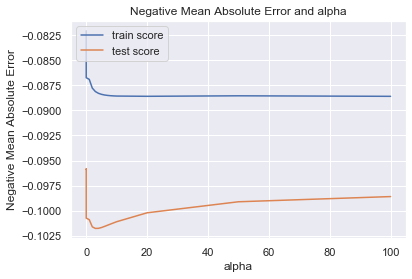

In [186]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [197]:
# Model with optimal alpha
# Ridge Regression

alpha = 10
ridge = Ridge(alpha = alpha)
ridge.fit(X_train, y_train)

# Predict
y_train_pred = ridge.predict(X_train)
print("Train R2 Score:", metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

y_test_pred = ridge.predict(X_test)
print("Test  R2 Score:", metrics.r2_score(y_true = y_test, y_pred = y_test_pred))


Train R2 Score: 0.8888651342992734
Test  R2 Score: 0.8186122731197494


#### From the above obtained R2 score, we get a very high R2 score on both our train and test data with the alpha value = 10.
#### Therefore, we will choose hyperparameter, alpha = 10 for our modelling

In [188]:
# Ridge Model coefficients

ridge.coef_

array([-7.90406507e-04,  2.09482830e-02,  2.36535372e-06,  5.41898624e-02,
        2.12898481e-02,  3.90284718e-03,  1.42683686e-02,  1.20854098e-02,
       -4.67109456e-03, -2.40970148e-02,  1.51161606e-03,  4.93003621e-03,
        2.47279137e-02,  9.54926780e-03, -3.79050218e-03,  6.95874068e-02,
        4.56448123e-02,  2.22748134e-03,  7.72745851e-04,  2.88493970e-03,
        2.74761259e-03, -3.60579993e-03,  3.83971151e-03, -5.48740470e-03,
        4.28972116e-06,  8.38286493e-03,  1.56526853e-02, -1.64510697e-02,
        2.69200515e-02, -3.19087934e-03,  5.46983347e-03,  3.49966809e-03,
        2.57053645e-05, -6.78381585e-03,  2.80171954e-05, -1.34743986e-06,
        5.23751270e-05,  1.36684563e-02,  1.59417073e-02,  5.89161487e-02,
       -6.20021316e-03,  4.04597858e-05,  6.82824969e-05,  3.84776046e-05,
        1.47219886e-04,  5.75565929e-02,  2.06836024e-02,  4.30059027e-02,
        2.77634540e-02,  7.03845375e-04, -3.28104663e-02,  1.33346905e-02,
        9.65940654e-03,  

In [189]:
# Ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = house.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 19.494),
 ('Id', -0.001),
 ('MSSubClass', 0.021),
 ('MSZoning', 0.0),
 ('LotArea', 0.054),
 ('Street', 0.021),
 ('Alley', 0.004),
 ('LotShape', 0.014),
 ('LandContour', 0.012),
 ('Utilities', -0.005),
 ('LotConfig', -0.024),
 ('LandSlope', 0.002),
 ('Neighborhood', 0.005),
 ('Condition1', 0.025),
 ('Condition2', 0.01),
 ('BldgType', -0.004),
 ('HouseStyle', 0.07),
 ('OverallQual', 0.046),
 ('OverallCond', 0.002),
 ('YearBuilt', 0.001),
 ('YearRemodAdd', 0.003),
 ('RoofStyle', 0.003),
 ('RoofMatl', -0.004),
 ('Exterior1st', 0.004),
 ('Exterior2nd', -0.005),
 ('MasVnrType', 0.0),
 ('MasVnrArea', 0.008),
 ('ExterQual', 0.016),
 ('ExterCond', -0.016),
 ('Foundation', 0.027),
 ('BsmtQual', -0.003),
 ('BsmtCond', 0.005),
 ('BsmtExposure', 0.003),
 ('BsmtFinType1', 0.0),
 ('BsmtFinSF1', -0.007),
 ('BsmtFinType2', 0.0),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.014),
 ('Heating', 0.016),
 ('HeatingQC', 0.059),
 ('CentralAir', -0.006),
 ('Electrical', 0.0),
 (

### Conclusion on Ridge Model
From the above, we can infer that LotArea, OverallQual, GrLivArea, PoolArea, BsmtHalfBath, GarageFinish, GarageQual, HeatingQC, Fence, Functional are the features which are affecting the sale price of the property. 

### Applying Lasso

In [190]:
lasso = Lasso()

# Cross Validation
folds = 5
model_cv = GridSearchCV(estimator = lasso,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [191]:
cv_results_lasso = pd.DataFrame(model_cv.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.035379,0.014270,0.000800,0.00040,0.0001,{'alpha': 0.0001},-0.089510,-0.098258,-0.099961,-0.096916,-0.092525,-0.095428,0.003855,1,-0.085920,-0.082115,-0.076690,-0.083704,-0.083164,-0.082319,0.003077
1,0.021586,0.008517,0.000801,0.00040,0.001,{'alpha': 0.001},-0.099511,-0.105927,-0.102876,-0.096054,-0.088207,-0.098516,0.006117,2,-0.092930,-0.089347,-0.082412,-0.083811,-0.089608,-0.087621,0.003918
2,0.005396,0.001019,0.000600,0.00049,0.01,{'alpha': 0.01},-0.098535,-0.105301,-0.103846,-0.098676,-0.093119,-0.099894,0.004336,3,-0.095741,-0.093124,-0.088707,-0.088060,-0.094133,-0.091953,0.003039
3,0.023587,0.003261,0.000600,0.00049,0.05,{'alpha': 0.05},-0.100784,-0.115388,-0.118514,-0.119087,-0.100416,-0.110828,0.008456,4,-0.107455,-0.105481,-0.101469,-0.102707,-0.106657,-0.104754,0.002299
4,0.029583,0.010066,0.000400,0.00049,0.1,{'alpha': 0.1},-0.104583,-0.124064,-0.126518,-0.124384,-0.108388,-0.117575,0.009188,8,-0.116685,-0.112355,-0.107958,-0.107105,-0.115256,-0.111872,0.003818


#### Plotting mean test and train scores with alpha

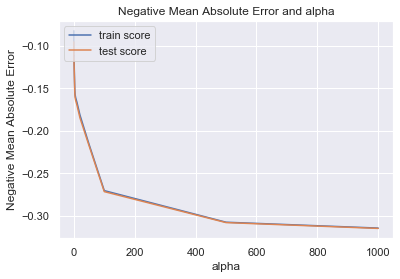

In [192]:
#Plotting

cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Let's us see the model evaluation with the hyperparameter alpha = 50

In [193]:
# Model with optimal alpha
# Lasso Regression

alpha = 50
lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)

# Predict
y_train_pred = lasso.predict(X_train)
print("Train R2 Score:", metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

y_test_pred = lasso.predict(X_test)
print("Test  R2 Score:", metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

Train R2 Score: 0.49535874684691195
Test  R2 Score: 0.515860156271025


In [194]:
# Lasso Model Coefficients

lasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  4.02426915e-06,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.41724335e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.68173575e-04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [195]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 10) for x in model_parameters]
cols = house.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.4274234183),
 ('Id', -0.0),
 ('MSSubClass', 0.0),
 ('MSZoning', 4.0243e-06),
 ('LotArea', 0.0),
 ('Street', -0.0),
 ('Alley', -0.0),
 ('LotShape', 0.0),
 ('LandContour', 0.0),
 ('Utilities', 0.0),
 ('LotConfig', -0.0),
 ('LandSlope', 0.0),
 ('Neighborhood', 0.0),
 ('Condition1', -0.0),
 ('Condition2', -0.0),
 ('BldgType', 0.0),
 ('HouseStyle', 0.0),
 ('OverallQual', 0.0),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.0),
 ('RoofStyle', -0.0),
 ('RoofMatl', -0.0),
 ('Exterior1st', -0.0),
 ('Exterior2nd', 0.0),
 ('MasVnrType', 0.0),
 ('MasVnrArea', 0.0),
 ('ExterQual', -0.0),
 ('ExterCond', -0.0),
 ('Foundation', 0.0),
 ('BsmtQual', 0.0),
 ('BsmtCond', 0.0),
 ('BsmtExposure', 0.0),
 ('BsmtFinType1', 0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinType2', -0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0001417243),
 ('TotalBsmtSF', 0.0),
 ('Heating', 0.0),
 ('HeatingQC', 0.0),
 ('CentralAir', -0.0),
 ('Electrical', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', -0.0),
 ('

### Final Conclusion

From above two models(Ridge and Lasso models), we can infer that Ridge Model is performing better than that of the Lasso Models. In Lasso models, we see most of the features are not considered as the coefficients are coming out to be 0 whereas in case of Ridge model, we can infer there are features(LotArea, OverallQual, GrLivArea, PoolArea, BsmtHalfBath, GarageFinish, GarageQual, HeatingQC, Fence, Functional) by looking at the coefficients, that are impacting the sale price of the property. Also, we are getting R2 score for Ridge Model higher than that of Lasso Model.